In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time

import util_functions as fs
import symbol_path as pth
import imp
imp.reload(fs)
imp.reload(pth)

%matplotlib inline

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [58]:
#Read music sheets - Binary thresholding and resizing
sheets = fs.get_images('./data/test_sheets', resize_factor=1, denoise=False, threshold=200)

>>> Folder : ./data/test_sheets : 12 files
01 : ./data/test_sheets/Sample01.jpg : (1657, 1177)
02 : ./data/test_sheets/Sample02.jpg : (1353, 1174)
03 : ./data/test_sheets/fire.jpg : (3508, 2479)
04 : ./data/test_sheets/hush.jpg : (1100, 850)
05 : ./data/test_sheets/kookaburra.jpg : (1453, 2453)
06 : ./data/test_sheets/mary.jpg : (1288, 2456)
07 : ./data/test_sheets/p1 (1).jpg : (2339, 1653)
08 : ./data/test_sheets/p1.jpg : (2339, 1653)
09 : ./data/test_sheets/p2 (1).jpg : (2339, 1653)
10 : ./data/test_sheets/p2.jpg : (2339, 1653)
11 : ./data/test_sheets/races.jpg : (1600, 1465)
12 : ./data/test_sheets/teapot.jpg : (1101, 851)
>>> Inverse binary thresholding with threshold value 200


In [59]:
sample_image = sheets[9]

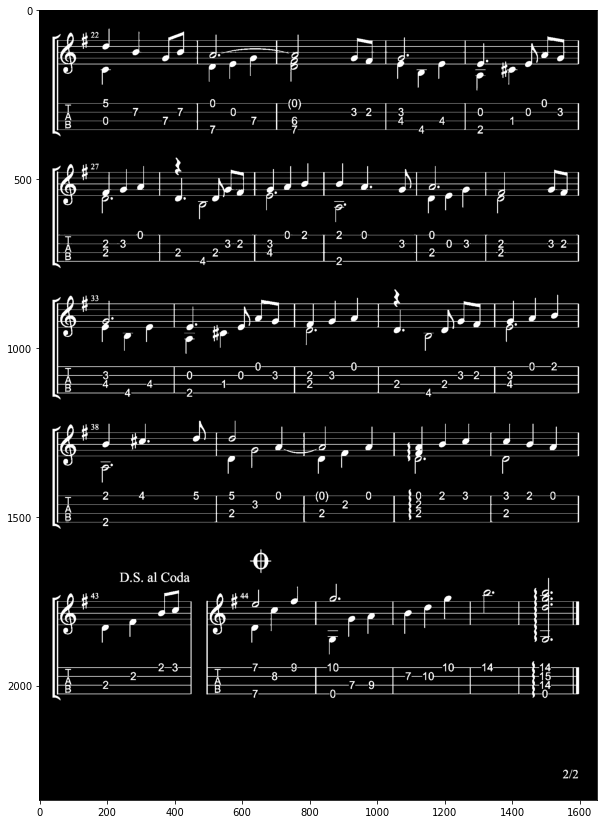

In [60]:
#Show sample
fs.plot_single_image(sample_image, off_axis=False)

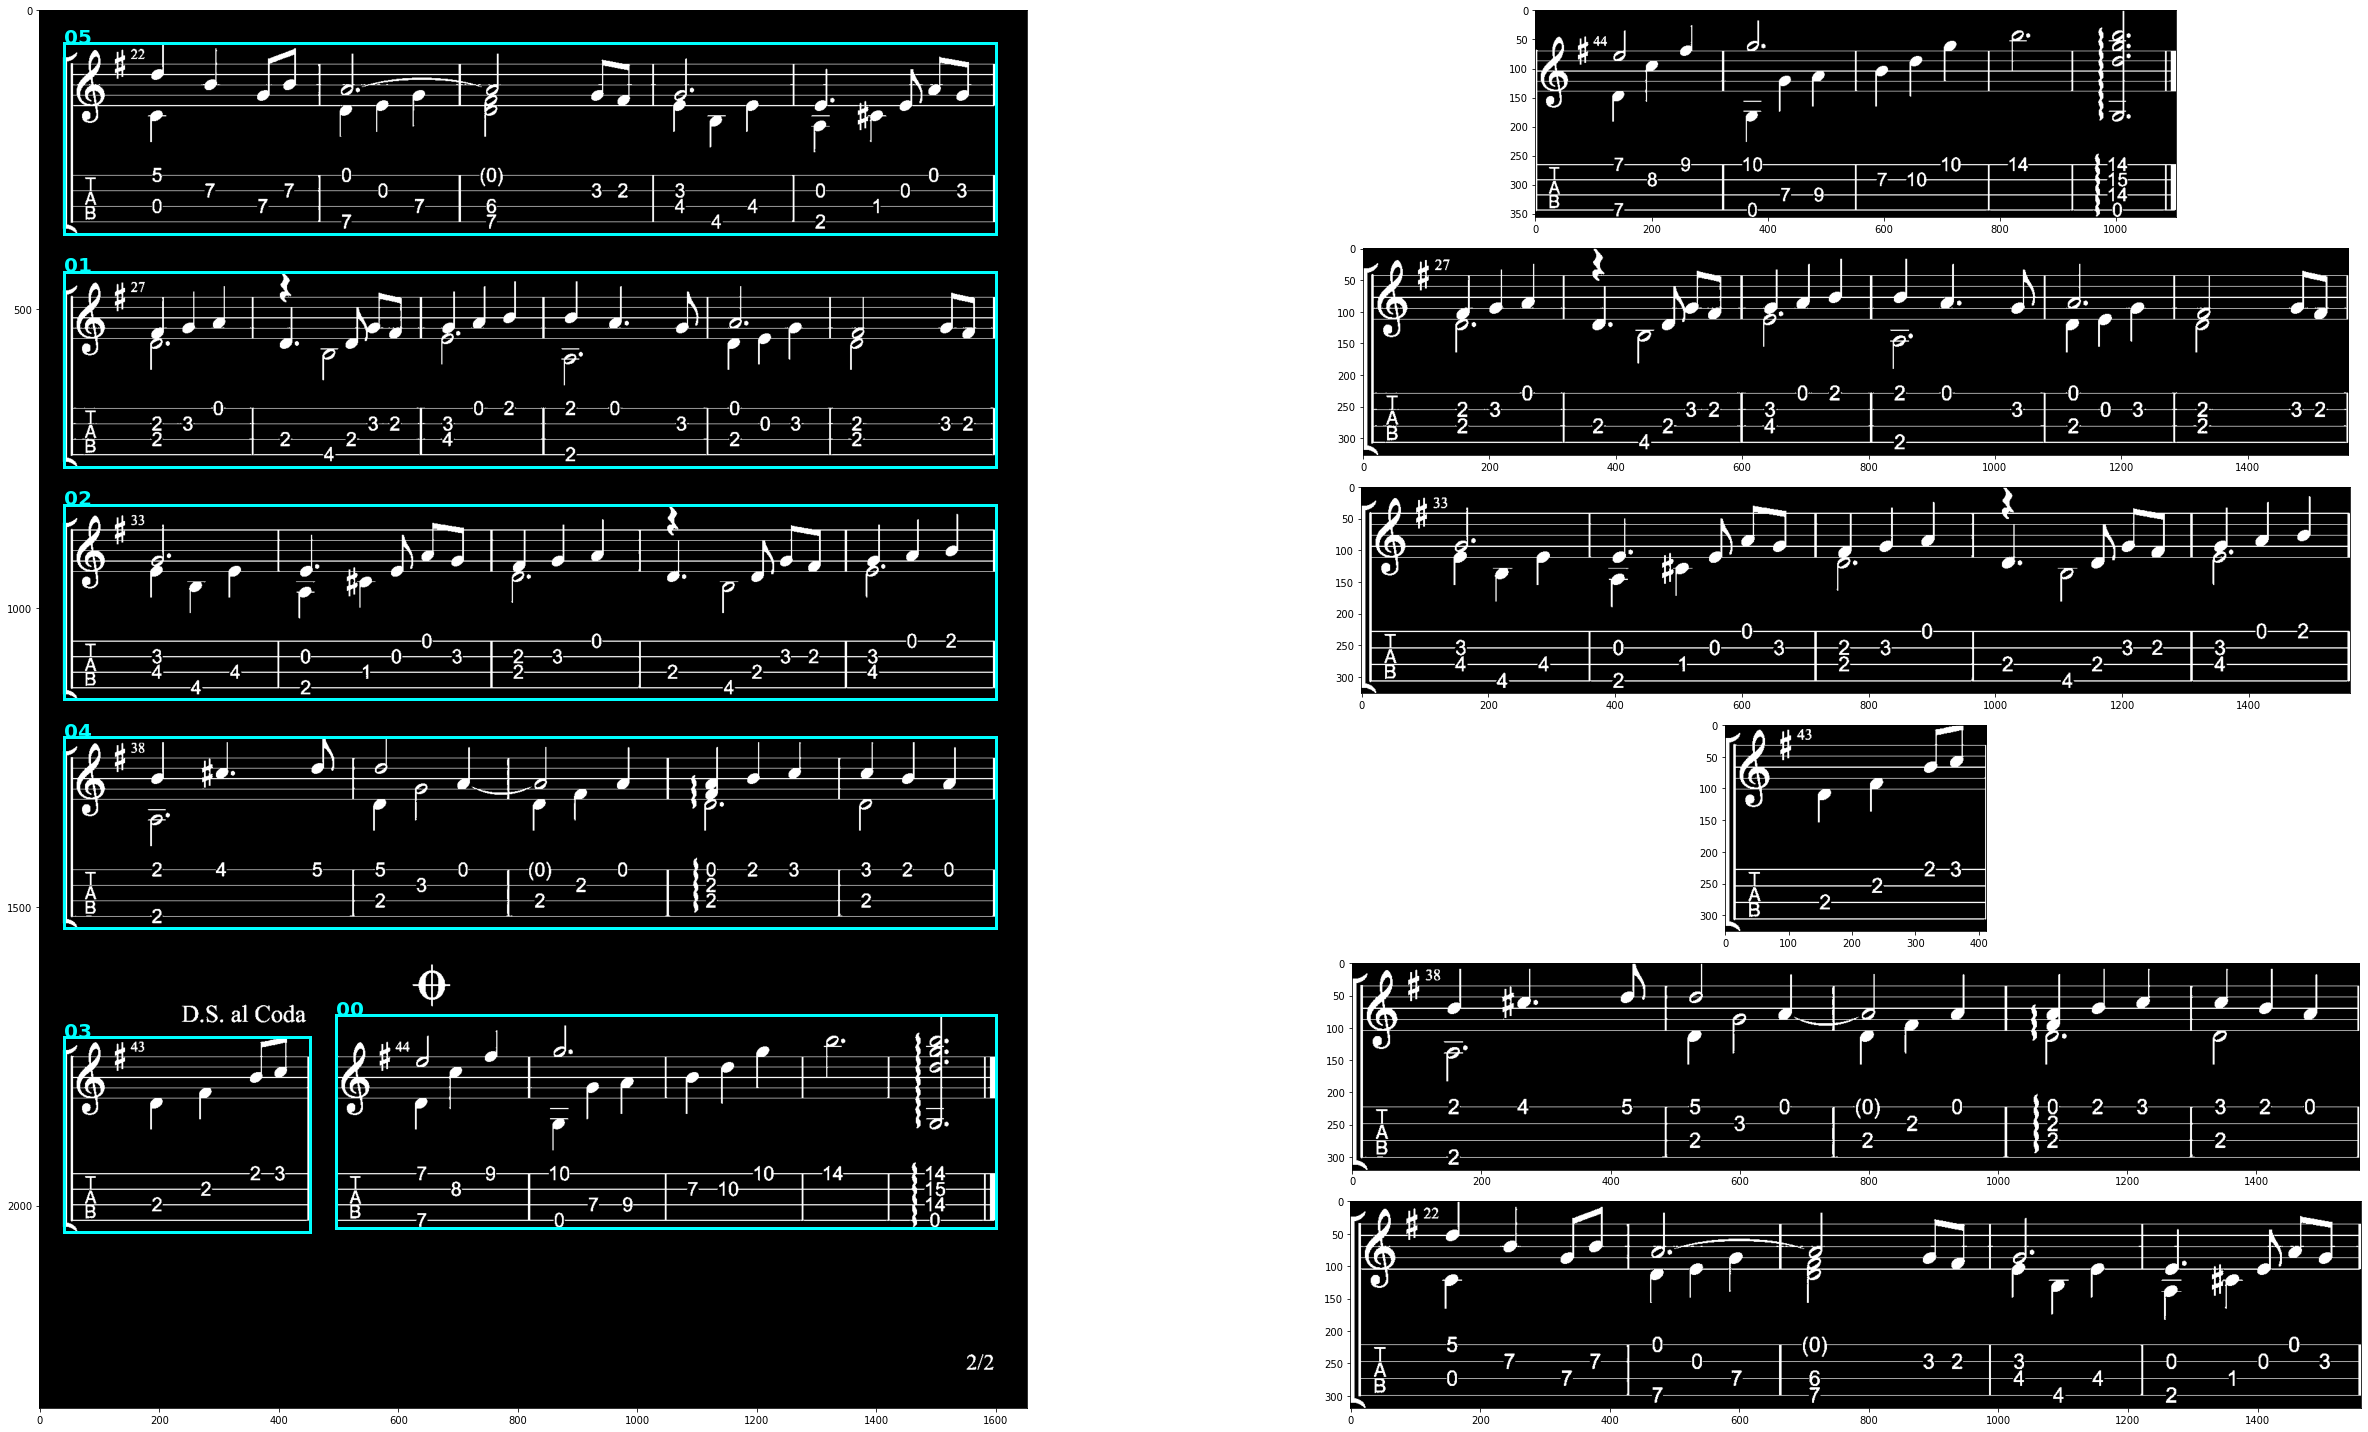

In [61]:
#Get main components of sheet
main_components, pos, _ = fs.get_main_components(sample_image)

#Show sample
import matplotlib.patches as patches

row = len(main_components)

fig = plt.figure(figsize=(40,20))
ax = plt.subplot2grid((row, 2), (0, 0), rowspan=row)
ax.imshow(sample_image, cmap='gray')
for i, (x, y, w, h, area) in enumerate(pos):  #Highlighting
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='cyan', fill=False, linewidth=3))
    ax.text(x, y, f'{i:02d}', color='cyan', fontsize=20, fontweight='bold')

for i in range(len(main_components)):
    ax = plt.subplot2grid((row, 2), (i, 1))
    ax.imshow(main_components[i], cmap='gray')


fig.set_tight_layout(True)
plt.show() 

In [62]:
for i, info in enumerate(pos):
    print(f'{i:02d} : x(column), y(row), width, height, area : {info}')

00 : x(column), y(row), width, height, area : [   496   1681   1104    356 391951]
01 : x(column), y(row), width, height, area : [    40    437   1560    327 482448]
02 : x(column), y(row), width, height, area : [    40    827   1560    326 482590]
03 : x(column), y(row), width, height, area : [    40   1718    412    326 127534]
04 : x(column), y(row), width, height, area : [    40   1216   1560    320 471504]
05 : x(column), y(row), width, height, area : [    40     55   1560    319 470424]


In [63]:
def arrange_components_idx(main_components, position):
    center = np.array([[i, x+w/2, y+h/2] for i, (x, y, w, h, _) in enumerate(position)], dtype=int)
    print(center)
    y_list = sorted(center[:,2])
    
    tmp = np.diff(y_list)
    interval = np.mean(tmp[np.where(tmp>np.mean(tmp)-0.5*np.std(tmp))])
    print(interval)
    
    
    idx_y = np.round((center[:,2]-y_list[0])/interval)
    
    print(np.round((center[:,2]-y_list[0])/interval, 2))
    print(idx_y)
    
    idx = np.lexsort((center[:,1], idx_y))
    print(center[idx])
    rearrange_components = list(np.array(main_components, dtype=object)[idx])
    rearrange_position = position[idx]
    return rearrange_components, rearrange_position
    

main_components, pos = arrange_components_idx(main_components, pos)

[[   0 1048 1859]
 [   1  820  600]
 [   2  820  990]
 [   3  246 1881]
 [   4  820 1376]
 [   5  820  214]]
411.25
[4.   0.94 1.89 4.05 2.83 0.  ]
[4. 1. 2. 4. 3. 0.]
[[   5  820  214]
 [   1  820  600]
 [   2  820  990]
 [   4  820 1376]
 [   3  246 1881]
 [   0 1048 1859]]


[[   0  820  214]
 [   1  820  600]
 [   2  820  990]
 [   3  820 1376]
 [   4  246 1881]
 [   5 1048 1859]]
411.25
[0.   0.94 1.89 2.83 4.05 4.  ]
[0. 1. 2. 3. 4. 4.]
[[   0  820  214]
 [   1  820  600]
 [   2  820  990]
 [   3  820 1376]
 [   4  246 1881]
 [   5 1048 1859]]


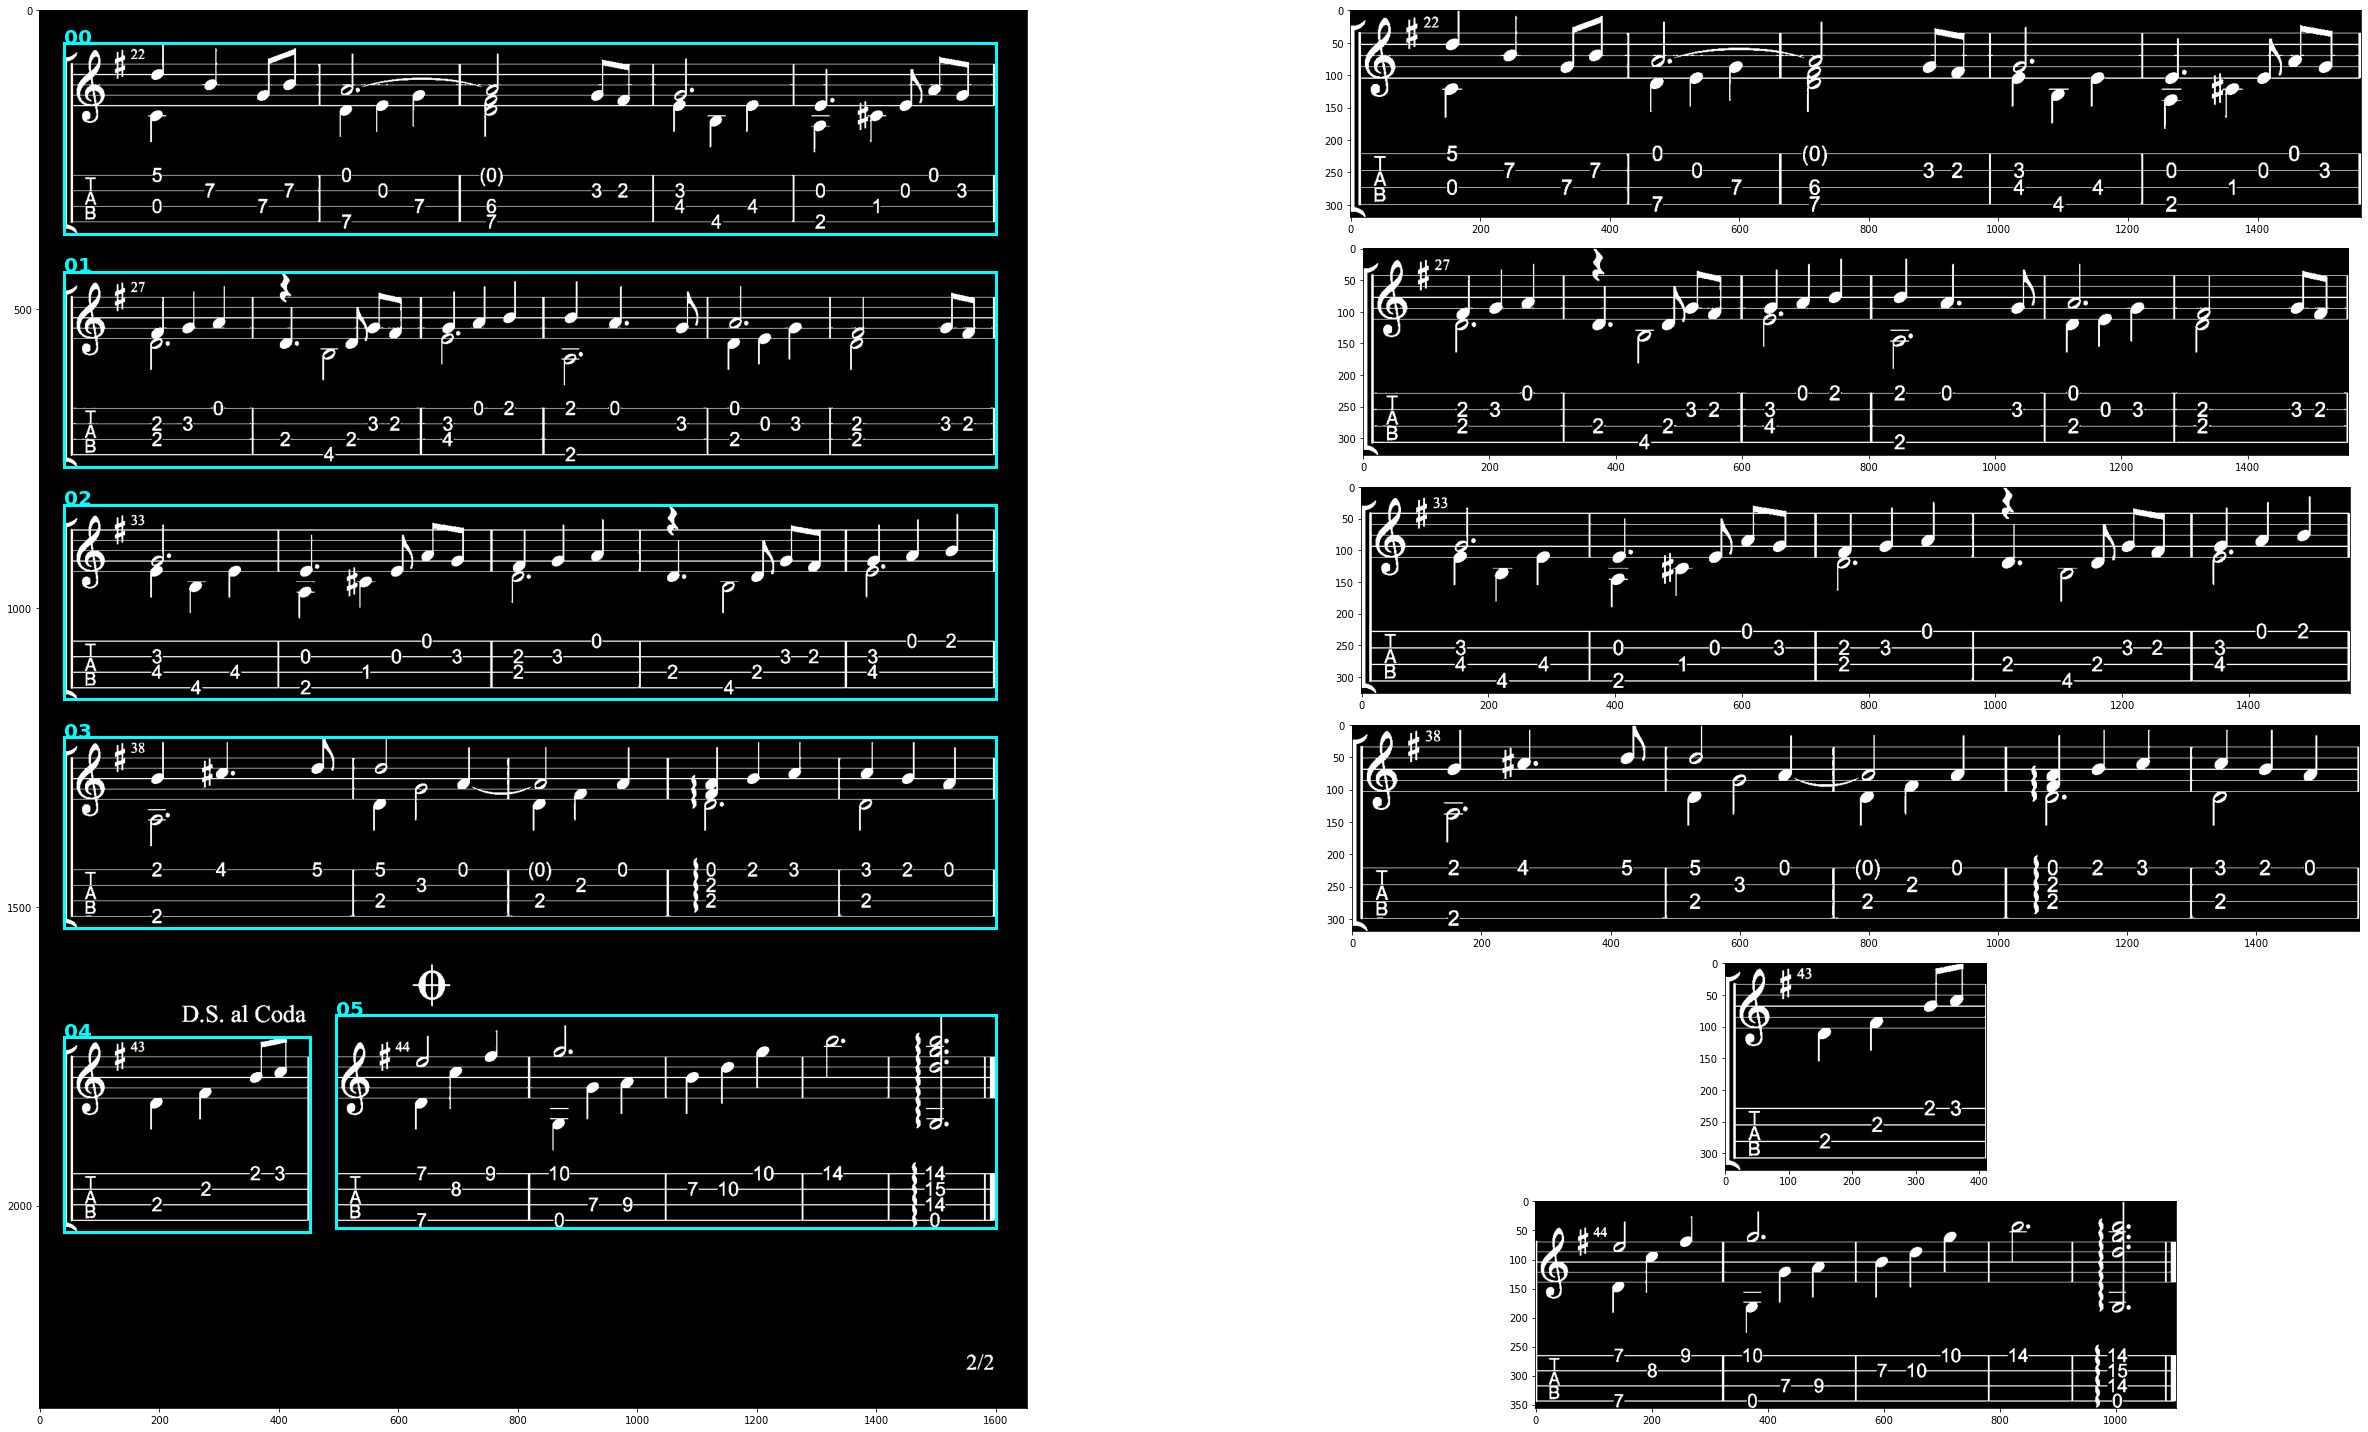

In [64]:
main_components, pos = arrange_components_idx(main_components, pos)

fig = plt.figure(figsize=(40,20))
ax = plt.subplot2grid((row, 2), (0, 0), rowspan=row)
ax.imshow(sample_image, cmap='gray')
for i, (x, y, w, h, area) in enumerate(pos):  #Highlighting
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='cyan', fill=False, linewidth=3))
    ax.text(x, y, f'{i:02d}', color='cyan', fontsize=20, fontweight='bold')

for i in range(len(main_components)):
    ax = plt.subplot2grid((row, 2), (i, 1))
    ax.imshow(main_components[i], cmap='gray')


fig.set_tight_layout(True)
plt.show() 